In [ ]:
import pandas as pd
import numpy as np

*Choose Dataset from Local Directory* 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary.xlsx to Salary.xlsx


***Load Dataset***

In [ ]:
df = pd.read_excel("Salary.xlsx")

***Summaries Dataset***

In [ ]:
df.head()

,Age,Education_Num,Capital_Gain,Hours_Per_Week,Income
0,60,17,0,43,<=50k
1,63,12,0,35,<=50k
2,79,15,0,31,<=50k
3,30,15,0,26,<=50k
4,39,9,0,37,>50k


In [ ]:
df.describe()

,Age,Education_Num,Capital_Gain,Hours_Per_Week
count,4999.000000,4999.000000,4999.0,4999.000000
mean,54.919984,13.000600,0.0,36.635127
std,20.554557,3.740026,0.0,6.893555
min,20.000000,7.000000,0.0,25.000000
25%,37.000000,10.000000,0.0,31.000000
50%,55.000000,13.000000,0.0,37.000000
75%,73.000000,16.000000,0.0,43.000000
max,90.000000,19.000000,0.0,48.000000


***Mapping Salary Data to Binary Value***

In [ ]:
income_set = set(df["Income"])
df["Income"] = df["Income"].map({"<=50k" : 0,">50k" : 1}).astype(int)
df.head

<bound method NDFrame.head of       Age  Education_Num  Capital_Gain  Hours_Per_Week  Income
0      60             17             0              43       0
1      63             12             0              35       0
2      79             15             0              31       0
3      30             15             0              26       0
4      39              9             0              37       1
...   ...            ...           ...             ...     ...
4994   82             14             0              48       1
4995   89              7             0              46       0
4996   76              7             0              34       1
4997   78              8             0              37       0
4998   71             12             0              30       0

[4999 rows x 5 columns]>

***Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)***

In [ ]:
X = df.iloc[:,:-1].values
X

array([[60, 17,  0, 43],
       [63, 12,  0, 35],
       [79, 15,  0, 31],
       ...,
       [76,  7,  0, 34],
       [78,  8,  0, 37],
       [71, 12,  0, 30]])

In [ ]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

***Spliting Dataset into Train & Test***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

***Feature Scaling***

*We scale our data to make all the features contribute equally to the result*

*Fit_Transform- fit method is calculating the mean and variance of each of the features present in our data*

*Transform - Transform method is transforming all the features using the respective mean and variance,*

*We want our data to be a completely new and a surprise set for our model*

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)
X_train
X_test

array([[ 0.51293856,  1.06455461,  0.        ,  1.64953167],
       [ 0.8502997 , -1.33886708,  0.        , -0.23489065],
       [-0.49914485, -1.07182022,  0.        , -0.23489065],
       ...,
       [ 0.51293856,  0.5304609 ,  0.        ,  1.64953167],
       [-1.22206157,  1.33160147,  0.        ,  0.48988717],
       [ 0.27196632,  0.5304609 ,  0.        ,  0.77979829]])

***Finding the Best K Value***


Text(0, 0.5, 'Mean Error')

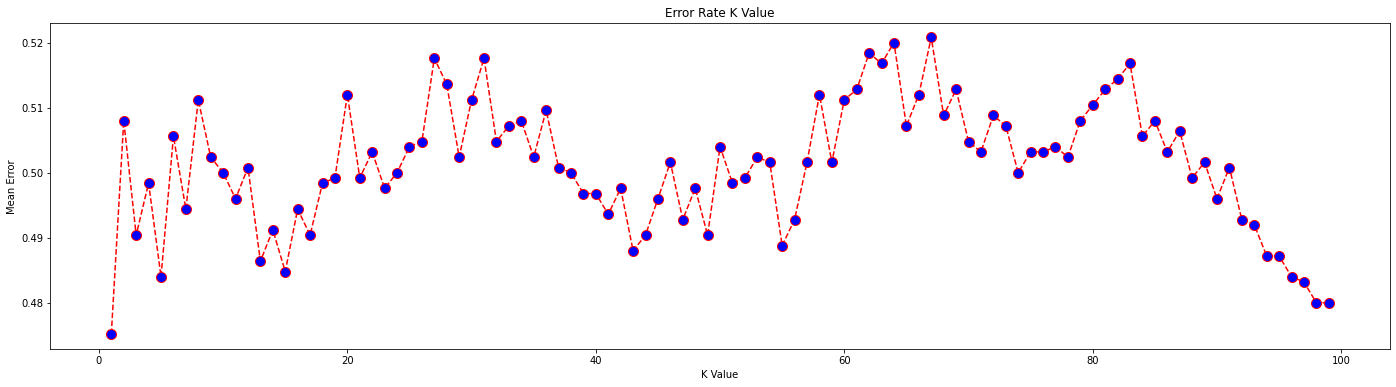

In [ ]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values Between 1 and 40

for i in range (1, 100):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, Y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

plt.figure(figsize = (24,6))
plt.plot(range(1,100), error, color = "red", linestyle= "dashed",marker = "o", markerfacecolor= "blue", markersize = 10)
plt.title("Error Rate K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

***Training***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1, metric = "minkowski", p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

***Predicting< Wheather new Employee Might Get Above 50 k Salary or Not*** 

In [ ]:
age = int(input("Enter Age : "))
Education = int(input("Enter the Education : "))
CapitalGain = int(input("Enter the Capital Gain : "))
weekHour = int(input("Enter the Total Weekly Working Hours : "))
new_Emp = [[age, Education, CapitalGain,weekHour]]
result = model.predict(sc.transform(new_Emp))
print(result)

if result == 1 :
  print("Employee might get sakary above 50K")
else :
  print("Employee might not get sakary above 50K")

Enter Age : 25
Enter the Education : 12
Enter the Capital Gain : 0
Enter the Total Weekly Working Hours : 28
[0]
Employee might not get sakary above 50K


***Prediction For all Test Data***

In [ ]:
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [0 1]
 [0 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


***Evaluating Model - Confusion Matrix***

In [ ]:
cfrom sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrim : ")
print(cm)

print("Accuracy of the model : {0}%".format(accuracy_score(Y_test,Y_pred)*100))

Confusion Matrim : 
[[324 265]
 [329 332]]
Accuracy of the model : 52.480000000000004%
